# scram2 demonstration

- Using the [scram2_docker container](https://hub.docker.com/r/sfletcher/scram2_docker/)
- Notebook started in the project root directory via:
```
docker run -it --rm  -v ${PWD}:/work -p 8888:8888 sfletcher/scram2_docker
```

#### Set up the Jupyter environment (optional)

In [1]:
%matplotlib inline
%autosave 0
#To display pandas dataframes inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas

Autosave disabled


### Process FASTQ files to collapsed FASTA
- FASTX-Toolkit from the Bioconda channel is installed in the scram2_docker container
- Full usage instructions are on [the Hannon Lab site](http://hannonlab.cshl.edu/fastx_toolkit/)

#### Example file and directory structure on the host

In [2]:
! tree

.
├── license
├── out_dir
│   └── treatment_a_profile_24.csv
├── ref
│   ├── GFP.fa
│   └── TAIR10_transposable_elements.fa
├── scram2_demonstration-DESKTOP-IT3P6VT.ipynb
├── scram2_demonstration.ipynb
└── seq
    ├── treatment_a_rep1.fa
    ├── treatment_a_rep2.fa
    ├── treatment_a_rep3.fa
    ├── treatment_b_rep1.fa
    ├── treatment_b_rep2.fa
    └── treatment_b_rep3.fa

3 directories, 12 files


#### scram2 help
- the scram2 aligner is in the container path

In [3]:
!scram2 -h

The ultra-fast siRNA aligner v0.1.0

Usage:
  scram2 [command]

Available Commands:
  compare     Compare normalised alignment counts and standard errors for 2 read file sets
  help        Help about any command
  profile     Align reads of length l from 1 read file set to all sequences in a reference file

Flags:
  -r, --alignTo string         path/to/FASTA reference file
  -1, --fastaSet1 string       comma-seperated path/to/collapsed FASTA file set 1
  -l, --len string             comma-seperated read (sRNA) lengths to align
      --maxLen int             Maximum read length to include for RPMR normalization (default 32)
      --minCount float         Minimum read count for alignment and to include for RPMR normalization (default 1)
      --minLen int             Minimum read length to include for RPMR normalization (default 18)
      --noSplit                Do not split alignment count for each read by the number of times it aligns
  -o, --outFilePrefix string   path/to/outfile pr

## Comparison alignments and scatter plots

- For comparing two treatments (e.g. wild-type verses mutant) - the output is the mean and standard error of the total alignments to each reference sequence
- By default, the alignment count of multi-mapping reads is split even between the number of loci aligned to (both within and among all reference sequences).  The -nosplit flag shows the maximum possible alignment count at each loci 
- Alignments are carried out seperately for each small RNA size (read length) entered in the -nt filed
- The read length aligned is appended to the alignment csv file name

#### Alignment of 2 x 3 replicates (treatment A & treatment B) x 3 read lengths (21, 22, 24 nt) to Arabidopsis transposable elements  FASTA reference file
- Artificial read files are in collapsed FASTA format (generated by FASTX-Toolkit)

In [6]:
!scram2 compare -r ref/TAIR10_transposable_elements.fa \
    -1 seq/treatment_a_rep1.fa,seq/treatment_a_rep2.fa,seq/treatment_a_rep3.fa \
    -2 seq/treatment_b_rep1.fa,seq/treatment_b_rep2.fa,seq/treatment_b_rep3.fa \
    -l 21,22,24 -o out_dir/treatment_a_vs_b 
    
    

Single read file seq/treatment_a_rep1.fa loaded:  777.7195ms
Single read file seq/treatment_a_rep2.fa loaded:  995.7271ms
Single read file seq/treatment_a_rep3.fa loaded:  998.7779ms
Read file set processed:  1.4369695s
Single read file seq/treatment_b_rep3.fa loaded:  446.3469ms
Single read file seq/treatment_b_rep2.fa loaded:  579.2117ms
Single read file seq/treatment_b_rep1.fa loaded:  655.2393ms
Read file set processed:  1.1100736s
No. of reference sequences:  31189
Reference file processed:  757.8191ms
Read file set aligned to reference/s:  1.198666s
Aligned read set processed (split count):  9.3485ms
Read file set aligned to reference/s:  1.1034137s
Aligned read set processed (split count):  9.8582ms
Alignments combined:  999µs
Written to file:  10.0782ms
Read file set aligned to reference/s:  1.3760199s
Aligned read set processed (split count):  22.3795ms
Read file set aligned to reference/s:  1.2684515s
Aligned read set processed (split count):  12.5087ms
Alignments combined:  

#### The normalised alignment count (reads per million reads) count and standard error for the two treatments (columns) aligned to each reference sequence (rows) are generated
- data can be easily imported and manipulated in a Pandas dataframe

In [7]:
comparison_alignment = pandas.read_csv('out_dir/treatment_a_vs_b_21.csv')

In [8]:
comparison_alignment.head()

Header  Mean count 1  \
0  AT1TE12275|-|3771003|3772133|ATREP10D|RC/Helit...         0.381   
1  AT1TE53660|-|16296281|16302985|VANDAL8|DNA/MuD...         0.062   
2   AT3TE76530|-|18873611|18873890|RP1_AT|DNA|280 bp         0.381   
3  AT4TE10605|-|2288785|2288835|ATCOPIA42|LTR/Cop...         0.085   
4  AT2TE02595|-|612658|612921|RathE2_cons|RathE2_...         0.916   

   Std. err 1  Mean count 2  Std. err 2  
0    0.074603         0.428    0.036744  
1    0.007753         0.057    0.008827  
2    0.023159         0.371    0.041245  
3    0.010323         0.069    0.011495  
4    0.097260         0.830    0.047424

### scram2_plot.py scatter can be used to generate interactive plots using the bokeh plotting library

In [9]:
%run /scram2_plot/scram2_plot.py scatter -h

usage: scram2_plot.py scatter [-h] [-plot_type PLOT_TYPE] [-a ALIGNMENT]
                              [-xlab [X_LABEL [X_LABEL ...]]]
                              [-ylab [Y_LABEL [Y_LABEL ...]]] [-browser]

optional arguments:
  -h, --help            show this help message and exit
  -plot_type PLOT_TYPE, --plot_type PLOT_TYPE
                        Bokeh plot type to display (log, log_error, linear or
                        all)
  -a ALIGNMENT, --alignment ALIGNMENT
                        SCRAM2 cdp alignment file
  -xlab [X_LABEL [X_LABEL ...]], --x_label [X_LABEL [X_LABEL ...]]
                        x label - corresponds to -s1 treatment in SCRAM2
                        arguments
  -ylab [Y_LABEL [Y_LABEL ...]], --y_label [Y_LABEL [Y_LABEL ...]]
                        y label - corresponds to -s2 treatment in SCRAM2
                        arguments
  -browser, --browser   If not using Jupyter Notebook, output plot to browser


#### 3 plot types - log, log + standard error bars (deafult) and linear
- plots are interactive - hover over each point of interest to identify header
- 21nt plots are gree, 22nt pink, and 24nt blue
- standard error bars are shown (x -> Treatment A, y -> Treatment b) in the default log + se bars plot
- linear plot ellipses also show standard error - x-plane = Treatment A s.e. & y-plane = Treatment B s.e.

In [10]:
%run /scram2_plot/scram2_plot.py scatter -a out_dir/treatment_a_vs_b_24.csv -plot_type all -xlab Treatment A (RPMR) -ylab Treatment B (RPMR)

Loading BokehJS ...

Loading BokehJS ...

Interactive log plot


Interactive log plot with se bars


Interactive linear plot


#### 24 nt plots are blue, other lengths are black

## Profile alignments and profile plots
- For aligning reads from one of more replicate collapsed FASTA files to one or more refrence sequences
- The reference sequence header, reference sequence length, read aligned, position, count and standard error are returned
- Alignments to the complementary strand are shown as negative counts at each position
- The alignment position is the distance from the 5' end of the reference sequence (with 1 the first position).  This distance is to the 5' end of the read of it aligns in the forward direction and the 3' end if it aligns in the reverse position.

#### Alignment of a set of 3 replicates (treatment A) x 3 read lengths (21, 22, 24 nt) to reference sequences in the Arabidopsis transposable elements FASTA file (31,189 sequences)

In [13]:
!scram2 profile -r ref/TAIR10_transposable_elements.fa \
    -1 seq/treatment_a_rep1.fa,seq/treatment_a_rep2.fa,seq/treatment_a_rep3.fa \
    -l 21,22,24 -o out_dir/treatment_a_profile
    

Single read file seq/treatment_a_rep2.fa loaded:  499.1595ms
Single read file seq/treatment_a_rep3.fa loaded:  510.5578ms
Single read file seq/treatment_a_rep1.fa loaded:  526.5932ms
Read file set processed:  1.1171851s
No. of reference sequences:  31189
Reference file processed:  582.0937ms
Read file set aligned to reference/s:  1.0958915s
Alignments processed:  18.0276ms
Written to file:  43.7316ms
Read file set aligned to reference/s:  1.372208s
Alignments processed:  23.8096ms
Written to file:  35.1967ms
Read file set aligned to reference/s:  1.4955954s
Alignments processed:  150.7207ms
Written to file:  297.1185ms


In [14]:
comparison_alignment = pandas.read_csv('out_dir/treatment_a_profile_21.csv')
comparison_alignment.head()

Header    len  \
0  AT1TE52125|-|15827287|15838845|ATHILA2|LTR/Gyp...  11559   
1  AT1TE52125|-|15827287|15838845|ATHILA2|LTR/Gyp...  11559   
2  AT1TE52125|-|15827287|15838845|ATHILA2|LTR/Gyp...  11559   
3  AT1TE53750|-|16325184|16327367|ATREP3|RC/Helit...   2184   
4  AT1TE53750|-|16325184|16327367|ATREP3|RC/Helit...   2184   

                    sRNA  Position  Count  Std. Err  
0  AAAAGGTCAAGAGACAAAGAT      3237 -0.004  0.000621  
1  TAATCCGGATTTCTCTTTATC      4253  0.003  0.000009  
2  AGAAAACCTACTGTAAACTGT     11514 -0.068  0.008258  
3  ACTAGATTTTAACCCGCGGTA        65  0.002  0.000265  
4  AAAAATAAATCGTCCCGCGGT        87 -0.007  0.000024

### scram2_plot.py profileplots can be used to generate plots using the matplotlib plotting library
- All profiles that meet the search criterea will be displayed.  This includes and search term in the reference header and those with a minimum alignment count in the most abundent read length (for multi plots) is over the cutoff (to filter out low abundence background alignments)  
- multi plots require 21, 22 and 24nt alignment input files (as these siRNA lengths are commonly plotted together)
- single plots plot one read length

In [15]:
%run /scram2_plot/scram2_plot.py profile multi -h

usage: scram2_plot.py profile multi [-h] [-a [ALIGNMENTS [ALIGNMENTS ...]]]
                                    [-cutoff CUTOFF]
                                    [-s [SEARCH [SEARCH ...]]] [-ylim YLIM]
                                    [-win WIN] [-pub]

optional arguments:
  -h, --help            show this help message and exit
  -a [ALIGNMENTS [ALIGNMENTS ...]], --alignments [ALIGNMENTS [ALIGNMENTS ...]]
                        21nt, 22nt and 24nt profile alignment csvs must be
                        included and must have the sRNA length at the terminus
                        of the file name (e.g. _21.csv
  -cutoff CUTOFF, --cutoff CUTOFF
                        Min. alignment RPMR from the most abundant profile (if
                        multi) to generate plot
  -s [SEARCH [SEARCH ...]], --search [SEARCH [SEARCH ...]]
                        Full header or substring of header
  -ylim YLIM, --ylim YLIM
                        +/- y axis limit
  -win WIN, --win WIN   Smooth

Loading 21 nt Alignment File

Loading 22 nt Alignment File

Loading 24 nt Alignment File

Extracting headers

AT5TE60080|+|16641990|16642980|ATREP10D|RC/Helitron|991 bp


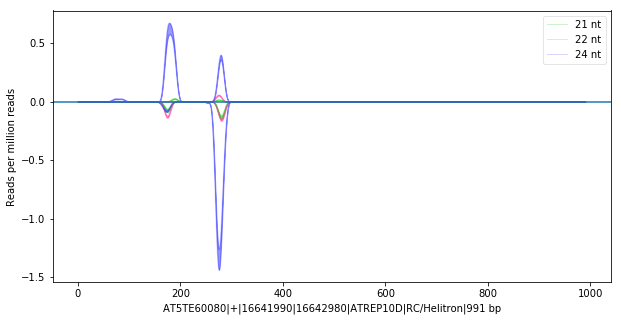

AT2TE22655|+|5607445|5607739|ATREP10A|RC/Helitron|295 bp


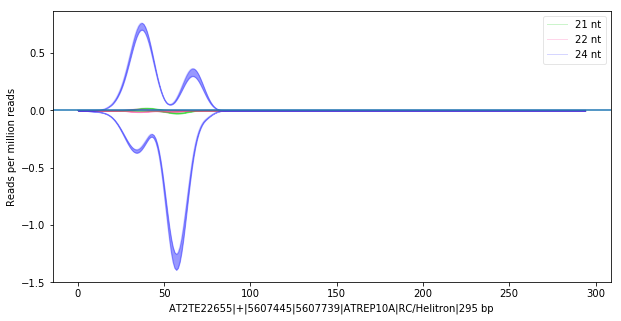

AT3TE41655|+|10008501|10009413|ATREP5|RC/Helitron|913 bp


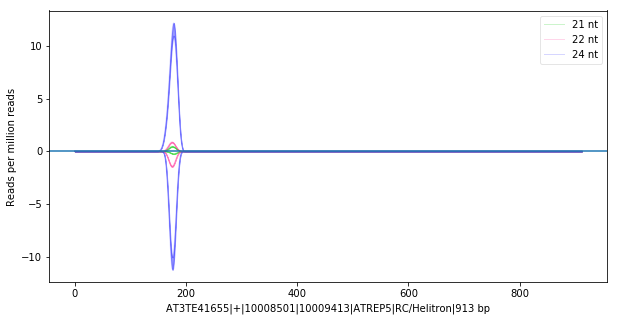

AT4TE60630|-|12956832|12957720|ATREP3|RC/Helitron|889 bp


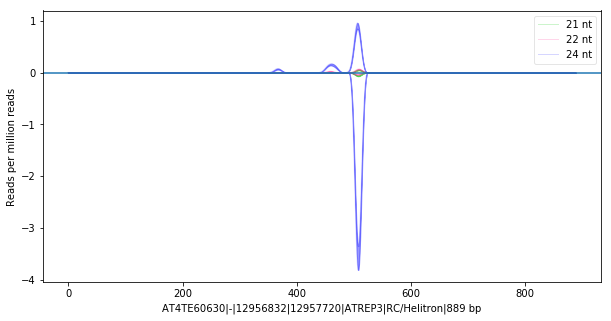

AT3TE33205|-|7920884|7922456|ATREP10B|RC/Helitron|1573 bp


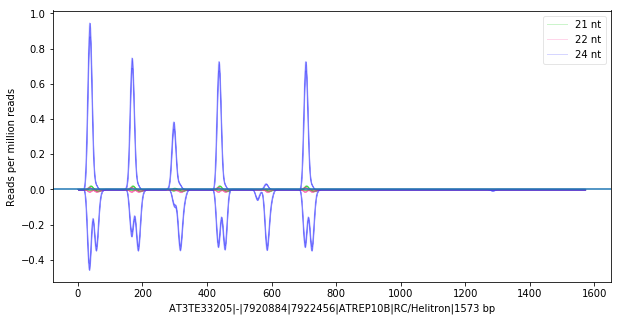

In [16]:
%run /scram2_plot/scram2_plot.py profile multi -s helitron \
    -a out_dir/treatment_a_profile_21.csv out_dir/treatment_a_profile_22.csv out_dir/treatment_a_profile_24.csv \
    -cutoff 30

#### Alignment to GFP

In [21]:
!scram2 profile -r ref/GFP.fa \
    -1 seq/treatment_a_rep1.fa,seq/treatment_a_rep2.fa,seq/treatment_a_rep3.fa \
    -l 21,22,24 -o out_dir/treatment_a_profile_GFP

Single read file seq/treatment_a_rep1.fa loaded:  511.6653ms
Single read file seq/treatment_a_rep3.fa loaded:  525.8003ms
Single read file seq/treatment_a_rep2.fa loaded:  534.0199ms
Read file set processed:  1.0926716s
No. of reference sequences:  1
Reference file processed:  2.7867ms
Read file set aligned to reference/s:  813.8µs
Alignments processed:  775.7µs
Written to file:  3.6ms
Read file set aligned to reference/s:  577.9µs
Alignments processed:  478.2µs
Written to file:  2.6256ms
Read file set aligned to reference/s:  451.4µs
Alignments processed:  223.5µs
Written to file:  1.7476ms


Loading 21 nt Alignment File

Loading 22 nt Alignment File

Loading 24 nt Alignment File

Extracting headers

GFP


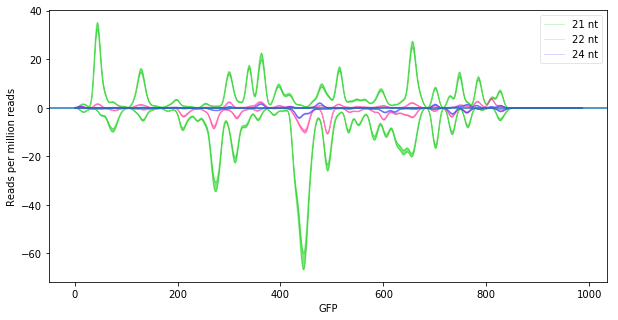

In [22]:
%run /scram2_plot/scram2_plot.py profile multi -s GFP \
    -a out_dir/treatment_a_profile_GFP_21.csv out_dir/treatment_a_profile_GFP_22.csv out_dir/treatment_a_profile_GFP_24.csv \
    -cutoff 30